In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# read the data
data_path= 'https://raw.githubusercontent.com/MLWave/Black-Boxxy/master/credit-card-default.csv'
ccdefaults = pd.read_csv(data_path)

In [3]:
ccdefaults.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

In [4]:
ccdefaults.tail()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[5 rows x 24 columns]

In [5]:
ccdefaults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [6]:
ccdefaults.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

In [7]:
ccdefaults.value_counts()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month
180000     2    1          2         28    1     -2     -2     -2     -2     -2     0          0          0          0          0          0          0         0         0         0         0         0         0                             2
230000     1    1          1         39   -1     -1     -1     -1     -1     -1     660        660        660        660        660        660        660       660       660       660       660       660       0                             2
90000      2    1          2         31    1     -2     -2     -2     -2     -2     0          0          0          0          0          0          0         0         0         0         0         0         0                             2
360000     1    1          2         

In [8]:
# printing the column names
ccdefaults.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
# printing the length and breath of dataset like size of a dataset
ccdefaults.shape

(30000, 24)

In [10]:
# Converting the column names into lower order
ccdefaults.rename(columns=lambda x: x.lower(), inplace=True)
ccdefaults.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

In [11]:
#Changing the names of columns
ccdefaults.rename(columns={'pay_0':'pay_1','default payment next month':'default'}, inplace=True)
ccdefaults.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [12]:
# Cheaking for the null values in the dataset
ccdefaults.isnull()

limit_bal    sex  education  marriage    age  pay_1  pay_2  pay_3  \
0          False  False      False     False  False  False  False  False   
1          False  False      False     False  False  False  False  False   
2          False  False      False     False  False  False  False  False   
3          False  False      False     False  False  False  False  False   
4          False  False      False     False  False  False  False  False   
...          ...    ...        ...       ...    ...    ...    ...    ...   
29995      False  False      False     False  False  False  False  False   
29996      False  False      False     False  False  False  False  False   
29997      False  False      False     False  False  False  False  False   
29998      False  False      False     False  False  False  False  False   
29999      False  False      False     False  False  False  False  False   

       pay_4  pay_5  ...  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  \
0      False  False  ...      False      False      False     False     False   
1      False  False  ...      False      False      False     False     False   
2      False  False  ...      False      False      False     False     False   
3      False  False  ...      False      False      False     False     False   
4      False  False  ...      False      False      False     False     False   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995  False  False  ...      False      False      False     False     False   
29996  False  False  ...      False      False      False     False     False   
29997  False  False  ...      False      False      False     False     False   
29998  False  False  ...      False      False      False     False     False   
29999  False  False  ...      False      False      False     False     False   

       pay_amt3  pay_amt4  pay_amt5  pay_amt6  default  
0         False     False     False     False    False  
1         False     False     False     False    False  
2         False     False     False     False    False  
3         False     False     False     False    False  
4         False     False     False     False    False  
...         ...       ...       ...       ...      ...  
29995     False     False     False     False    False  
29996     False     False     False     False    False  
29997     False     False     False     False    False  
29998     False     False     False     False    False  
29999     False     False     False     False    False  

[30000 rows x 24 columns]

In [13]:
# checking the total number of missing values in the entire dataset i.e., columns and rows
ccdefaults.isnull().sum().sum()

0

In [14]:
# Checking the correlation between the variables
ccdefaults.corr()

limit_bal       sex  education  marriage       age     pay_1  \
limit_bal   1.000000  0.024755  -0.219161 -0.108139  0.144713 -0.271214   
sex         0.024755  1.000000   0.014232 -0.031389 -0.090874 -0.057643   
education  -0.219161  0.014232   1.000000 -0.143464  0.175061  0.105364   
marriage   -0.108139 -0.031389  -0.143464  1.000000 -0.414170  0.019917   
age         0.144713 -0.090874   0.175061 -0.414170  1.000000 -0.039447   
pay_1      -0.271214 -0.057643   0.105364  0.019917 -0.039447  1.000000   
pay_2      -0.296382 -0.070771   0.121566  0.024199 -0.050148  0.672164   
pay_3      -0.286123 -0.066096   0.114025  0.032688 -0.053048  0.574245   
pay_4      -0.267460 -0.060173   0.108793  0.033122 -0.049722  0.538841   
pay_5      -0.249411 -0.055064   0.097520  0.035629 -0.053826  0.509426   
pay_6      -0.235195 -0.044008   0.082316  0.034345 -0.048773  0.474553   
bill_amt1   0.285430 -0.033642   0.023581 -0.023472  0.056239  0.187068   
bill_amt2   0.278314 -0.031183   0.018749 -0.021602  0.054283  0.189859   
bill_amt3   0.283236 -0.024563   0.013002 -0.024909  0.053710  0.179785   
bill_amt4   0.293988 -0.021880  -0.000451 -0.023344  0.051353  0.179125   
bill_amt5   0.295562 -0.017005  -0.007567 -0.025393  0.049345  0.180635   
bill_amt6   0.290389 -0.016733  -0.009099 -0.021207  0.047613  0.176980   
pay_amt1    0.195236 -0.000242  -0.037456 -0.005979  0.026147 -0.079269   
pay_amt2    0.178408 -0.001391  -0.030038 -0.008093  0.021785 -0.070101   
pay_amt3    0.210167 -0.008597  -0.039943 -0.003541  0.029247 -0.070561   
pay_amt4    0.203242 -0.002229  -0.038218 -0.012659  0.021379 -0.064005   
pay_amt5    0.217202 -0.001667  -0.040358 -0.001205  0.022850 -0.058190   
pay_amt6    0.219595 -0.002766  -0.037200 -0.006641  0.019478 -0.058673   
default    -0.153520 -0.039961   0.028006 -0.024339  0.013890  0.324794   

              pay_2     pay_3     pay_4     pay_5  ...  bill_amt4  bill_amt5  \
limit_bal -0.296382 -0.286123 -0.267460 -0.249411  ...   0.293988   0.295562   
sex       -0.070771 -0.066096 -0.060173 -0.055064  ...  -0.021880  -0.017005   
education  0.121566  0.114025  0.108793  0.097520  ...  -0.000451  -0.007567   
marriage   0.024199  0.032688  0.033122  0.035629  ...  -0.023344  -0.025393   
age       -0.050148 -0.053048 -0.049722 -0.053826  ...   0.051353   0.049345   
pay_1      0.672164  0.574245  0.538841  0.509426  ...   0.179125   0.180635   
pay_2      1.000000  0.766552  0.662067  0.622780  ...   0.222237   0.221348   
pay_3      0.766552  1.000000  0.777359  0.686775  ...   0.227202   0.225145   
pay_4      0.662067  0.777359  1.000000  0.819835  ...   0.245917   0.242902   
pay_5      0.622780  0.686775  0.819835  1.000000  ...   0.271915   0.269783   
pay_6      0.575501  0.632684  0.716449  0.816900  ...   0.266356   0.290894   
bill_amt1  0.234887  0.208473  0.202812  0.206684  ...   0.860272   0.829779   
bill_amt2  0.235257  0.237295  0.225816  0.226913  ...   0.892482   0.859778   
bill_amt3  0.224146  0.227494  0.244983  0.243335  ...   0.923969   0.883910   
bill_amt4  0.222237  0.227202  0.245917  0.271915  ...   1.000000   0.940134   
bill_amt5  0.221348  0.225145  0.242902  0.269783  ...   0.940134   1.000000   
bill_amt6  0.219403  0.222327  0.239154  0.262509  ...   0.900941   0.946197   
pay_amt1  -0.080701  0.001295 -0.009362 -0.006089  ...   0.233012   0.217031   
pay_amt2  -0.058990 -0.066793 -0.001944 -0.003191  ...   0.207564   0.181246   
pay_amt3  -0.055901 -0.053311 -0.069235  0.009062  ...   0.300023   0.252305   
pay_amt4  -0.046858 -0.046067 -0.043461 -0.058299  ...   0.130191   0.293118   
pay_amt5  -0.037093 -0.035863 -0.033590 -0.033337  ...   0.160433   0.141574   
pay_amt6  -0.036500 -0.035861 -0.026565 -0.023027  ...   0.177637   0.164184   
default    0.263551  0.235253  0.216614  0.204149  ...  -0.010156  -0.006760   

           bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  \
limit_bal   0.290389  0.195236  0.178408  0.210167  0.203242

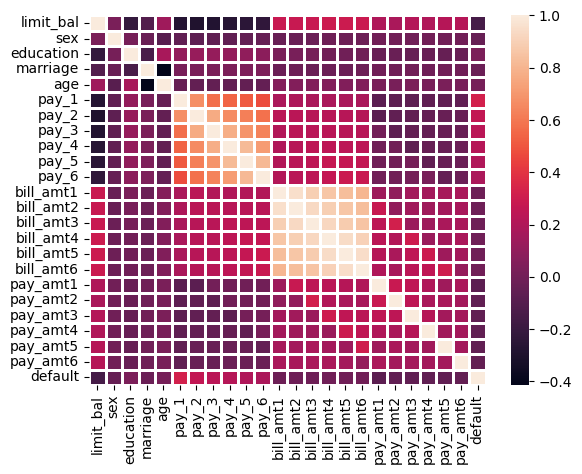

In [15]:
# Plotting the heat map of correlations of a data set
sns.heatmap(ccdefaults.corr(),linewidth=0.9)
plt.show()

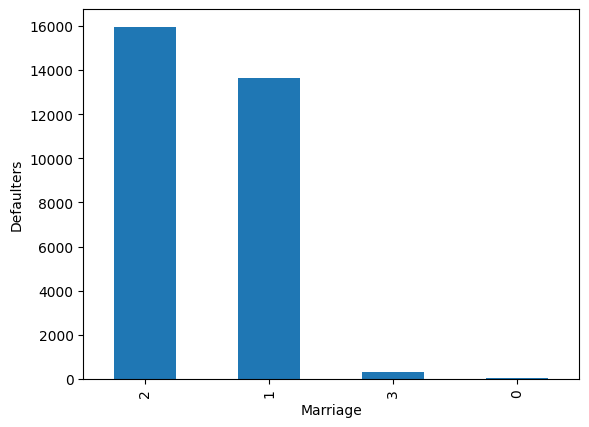

In [16]:
ccdefaults.marriage.value_counts().plot(kind = 'bar')
plt.xlabel('Marriage')
plt.ylabel('Defaulters')
plt.show()

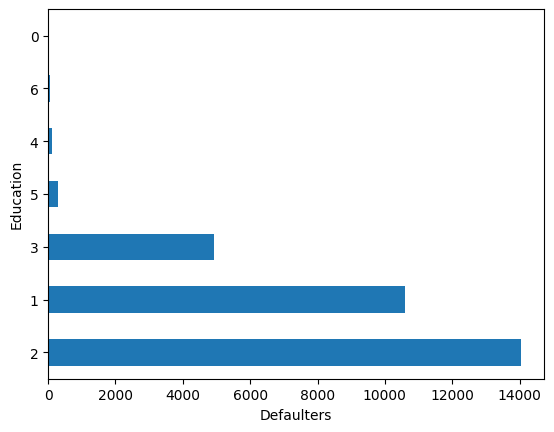

In [17]:
ccdefaults.education.value_counts().plot(kind = "barh")
plt.xlabel('Defaulters')
plt.ylabel('Education')
plt.show()

In [18]:
def draw_histograms(ccdefaults, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        ccdefaults[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

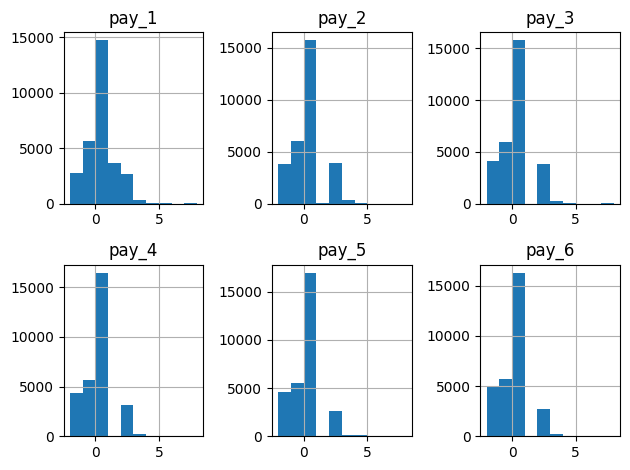

In [19]:
late = ccdefaults[['pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [20]:
# Checking the unique values in columns of EDUCATION and MARRIAGE
print("\n", "ccdefaults['education'].unique()", "\n", ccdefaults['education'].unique())
print("\n", "ccdefaults['marriage'].unique()","\n", ccdefaults['marriage'].unique())


 ccdefaults['education'].unique() 
 [2 1 3 5 4 6 0]

 ccdefaults['marriage'].unique() 
 [1 2 3 0]


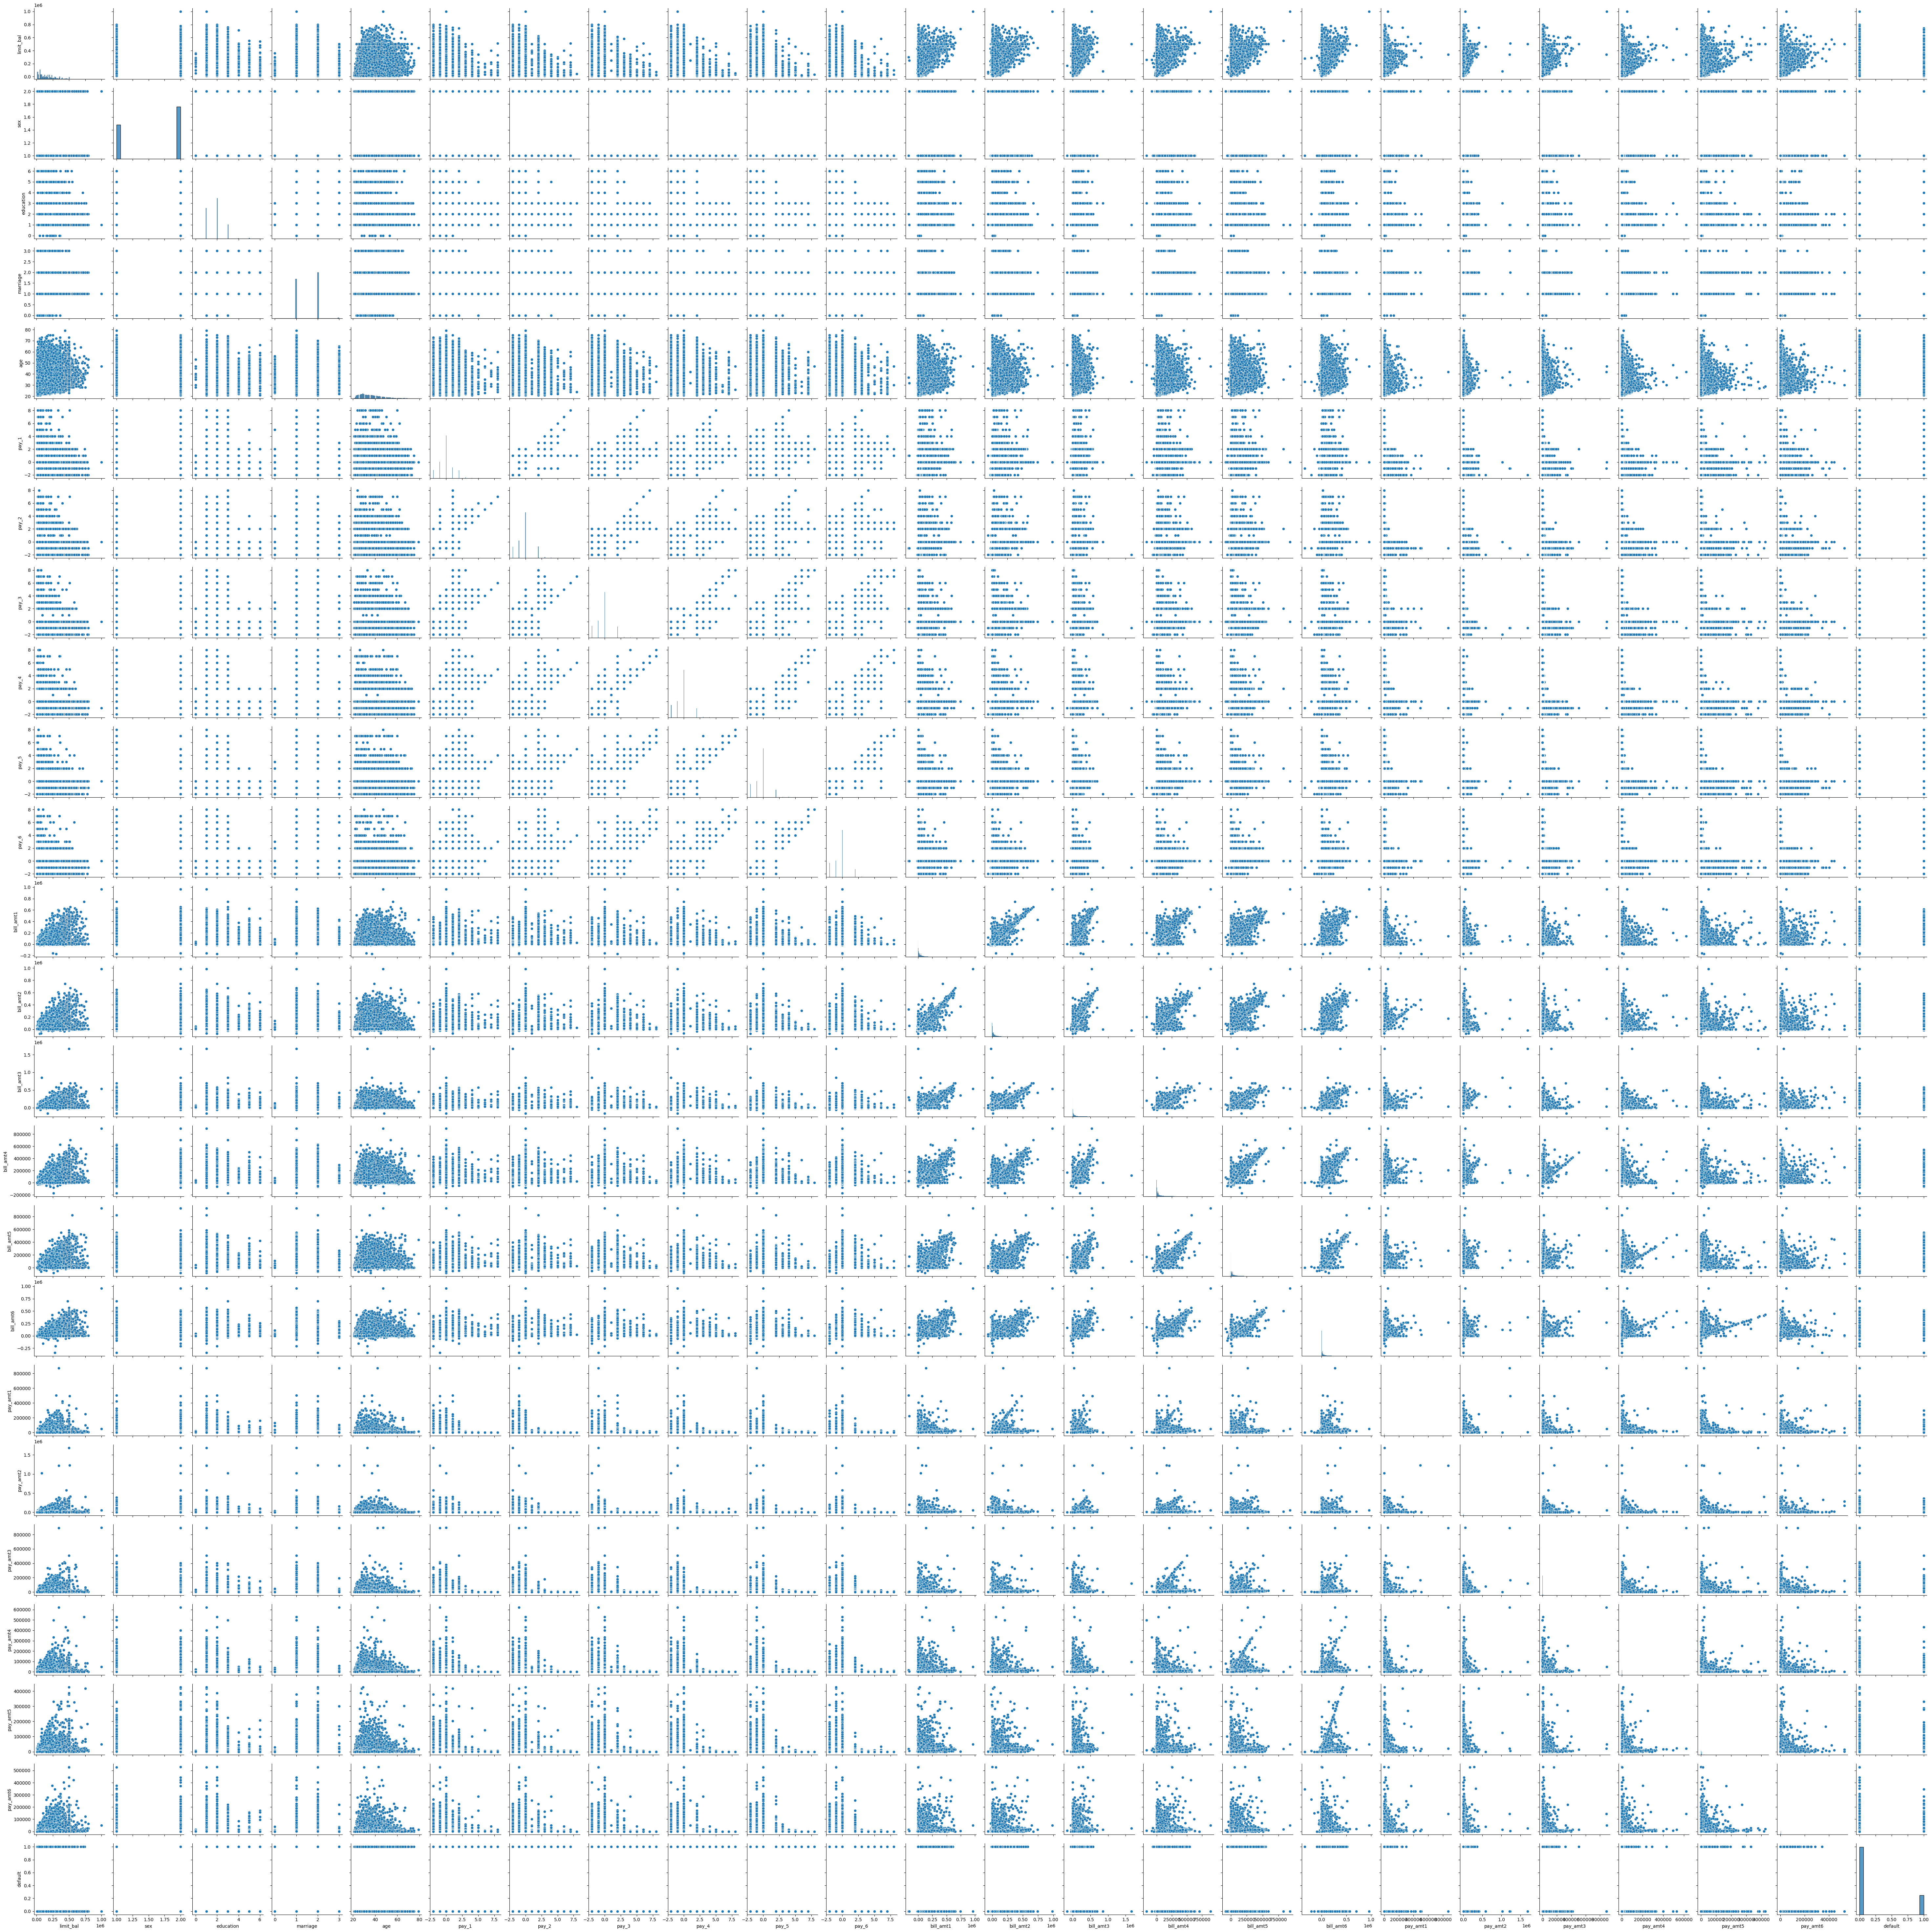

In [21]:
sns.pairplot(ccdefaults)

In [22]:
# Transforming values for education
ccdefaults['grad_school'] = (ccdefaults['education'] == 1).astype('int')
ccdefaults['university'] = (ccdefaults['education'] == 2).astype('int')
ccdefaults['high_school'] = (ccdefaults['education'] == 3).astype('int')

In [23]:
# Transforming values for Sex and marriage
ccdefaults['male'] = (ccdefaults['sex']==1).astype('int')
ccdefaults['married'] = (ccdefaults['marriage'] == 1).astype('int')

In [24]:
# Dropping the columns of Education, Marriage and Sex
ccdefaults.drop(['sex','marriage', 'education'], axis=1, inplace=True)
print("\n", 50 * "-", "\n", "ccdefaults.head(10)", "\n", ccdefaults.head(10))
print("\n", 50 * "-", "\n", "ccdefaults.columns", "\n", ccdefaults.columns)


 -------------------------------------------------- 
 ccdefaults.head(10) 
    limit_bal  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0      20000   24      2      2     -1     -1     -2     -2       3913   
1     120000   26     -1      2      0      0      0      2       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57     -1      0     -1      0      0      0       8617   
5      50000   37      0      0      0      0      0      0      64400   
6     500000   29      0      0      0      0      0      0     367965   
7     100000   23      0     -1     -1      0      0     -1      11876   
8     140000   28      0      0      2      0      0      0      11285   
9      20000   35     -2     -2     -2     -2     -1     -1          0   

   bill_amt2  ...  pay_amt3  pay_amt4  pay_amt5  pay_amt6  default  \
0       3102  ...         0         0 

In [25]:
print("\n", 50 * "-", "\n", "\nLower the column names for pay delay") 
# For pay_i features: if >0 then it means the customer was delayed i months ago
pay_features = ['pay_' + str(i) for i in range(1,7)]
for p in pay_features:
    ccdefaults[p] = (ccdefaults[p] > 0).astype(int)
print("\n", 50 * "-", "\n", "pay_features", "\n", pay_features)
print("\n", 50 * "-", "\n", "ccdefaults.head(10)", "\n", ccdefaults.head(10))
print("\n", 50 * "-", "\n", "ccdefaults.columns", "\n", ccdefaults.columns)


 -------------------------------------------------- 
 
Lower the column names for pay delay

 -------------------------------------------------- 
 pay_features 
 ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

 -------------------------------------------------- 
 ccdefaults.head(10) 
    limit_bal  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0      20000   24      1      1      0      0      0      0       3913   
1     120000   26      0      1      0      0      0      1       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57      0      0      0      0      0      0       8617   
5      50000   37      0      0      0      0      0      0      64400   
6     500000   29      0      0      0      0      0      0     367965   
7     100000   23      0      0      0      0      0      0      11876   
8     140000   28      0      0      1 

In [26]:
df_split = ccdefaults.sample(frac=0.3,random_state=200)
new_df = df_split.drop('default', axis=1)
new_df.head()

limit_bal  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
17269     130000   34      0      0      0      0      0      0      99891   
22363     290000   27      0      0      0      0      0      0        168   
23879     360000   27      0      0      0      0      0      0       2807   
9073      110000   35      0      1      0      0      0      0        549   
25082     260000   48      0      0      0      0      0      0     154927   

       bill_amt2  ...  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
17269     101032  ...      5300      4000      4000      4000      6100   
22363        569  ...      1000      1000       200       265       500   
23879        894  ...      5970      1396         0         0         0   
9073         179  ...      1166         0       446      1729         0   
25082     158848  ...      6000      7100      5300      5000      5000   

       grad_school  university  high_school  male  married  
17269            0           1            0     0        1  
22363            1           0            0     0        0  
23879            1           0            0     1        0  
9073             1           0            0     0        0  
25082            0           0            1     1        1  

[5 rows x 25 columns]

In [27]:
new_y = df_split['default']
new_y.head()

17269    0
22363    0
23879    0
9073     0
25082    0
Name: default, dtype: int64

In [28]:
target_name = 'default'
X = ccdefaults.drop('default', axis=1)
print("\n", "X.head(10)", "\n", X.head(10))
print("\n", "X.columns", "\n", X.columns)


 X.head(10) 
    limit_bal  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0      20000   24      1      1      0      0      0      0       3913   
1     120000   26      0      1      0      0      0      1       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57      0      0      0      0      0      0       8617   
5      50000   37      0      0      0      0      0      0      64400   
6     500000   29      0      0      0      0      0      0     367965   
7     100000   23      0      0      0      0      0      0      11876   
8     140000   28      0      0      1      0      0      0      11285   
9      20000   35      0      0      0      0      0      0          0   

   bill_amt2  ...  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0       3102  ...       689         0         0         0         0   
1       1725  ...      1000 

### Using Robost Scaler to transform X

In [29]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
feature_names = X.columns
X = robust_scaler.fit_transform(X)
print("\n", "after robust_scaler.fit_transform(X), X is as follows:", "\n", X)


 after robust_scaler.fit_transform(X), X is as follows: 
 [[-0.63157895 -0.76923077  1.         ...  0.          0.
   1.        ]
 [-0.10526316 -0.61538462  0.         ...  0.          0.
   0.        ]
 [-0.26315789  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.57894737  0.23076923  1.         ...  0.          1.
   0.        ]
 [-0.31578947  0.53846154  1.         ...  1.          1.
   1.        ]
 [-0.47368421  0.92307692  0.         ...  0.          1.
   1.        ]]


In [30]:
y = ccdefaults[target_name]
print("\n", "y", "\n", y.head(10))


 y 
 0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: default, dtype: int64


### Creating train and test dataset

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55, stratify=y)
print("\n", "X_train", "\n", X_train)
print("\n", "X_test", "\n", X_test)
print("\n", "y_train", "\n", y_train.head(10))
print("\n", "y_test", "\n", y_test.head(10))


 X_train 
 [[ 1.47368421 -0.30769231  0.         ...  0.          0.
   0.        ]
 [-0.10526316  0.07692308  1.         ...  0.          0.
   0.        ]
 [ 0.21052632  0.69230769  0.         ...  1.          1.
   1.        ]
 ...
 [-0.31578947  0.53846154  0.         ...  0.          1.
   0.        ]
 [-0.47368421 -0.92307692  0.         ...  0.          1.
   0.        ]
 [-0.63157895  0.          0.         ...  0.          1.
   0.        ]]

 X_test 
 [[-0.42105263  0.07692308  0.         ...  0.          0.
   1.        ]
 [-0.26315789 -0.61538462  1.         ...  0.          0.
   0.        ]
 [-0.21052632  0.46153846  1.         ...  0.          0.
   1.        ]
 ...
 [ 0.68421053 -0.38461538  0.         ...  0.          0.
   0.        ]
 [ 0.05263158 -0.15384615  1.         ...  0.          0.
   0.        ]
 [-0.52631579  1.07692308  0.         ...  0.          0.
   0.        ]]

 y_train 
 3954     0
1345     0
14944    0
29048    0
3531     0
23382    0
28043    0


### Creating the dataframe to restore to values of different models

In [32]:
print("\n", 50 * "-", "\nCreating Data Frame Evaluation Matrix")
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['LogisticReg', 'Decision Tree', 'k-nn', 'Adaboost', 'Random Forest',],columns=['Accuracy', 'F-1 Score', 'Precision', 'Sensitivity', 'Specificity'])
metrics


 -------------------------------------------------- 
Creating Data Frame Evaluation Matrix


Accuracy F-1 Score Precision Sensitivity Specificity
LogisticReg        NaN       NaN       NaN         NaN         NaN
Decision Tree      NaN       NaN       NaN         NaN         NaN
k-nn               NaN       NaN       NaN         NaN         NaN
Adaboost           NaN       NaN       NaN         NaN         NaN
Random Forest      NaN       NaN       NaN         NaN         NaN

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='liblinear', random_state=55)
y = logistic_regression.fit(X_train, y_train)

In [34]:
y_predict = y.predict(X_test)
y_predict

array([0, 1, 1, ..., 0, 1, 0])

In [35]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
conf_matrix

array([[4427,  246],
       [ 920,  407]])

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
acc_score = accuracy_score(y_test, y_predict)
print('Accuracy :', acc_score)

F1_score = f1_score(y_test, y_predict)
print('F1_Score :', F1_score)

Precission = precision_score(y_test, y_predict)
print('Precission :', Precission)

sensitivity1 = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
print('Specificity : ', specificity1)

Accuracy : 0.8056666666666666
F1_Score : 0.4111111111111111
Precission : 0.6232771822358346
Sensitivity :  0.9473571581425209
Specificity :  0.306706857573474


In [37]:
train_accuracy = logistic_regression.score(X_train, y_train)
test_accuracy = logistic_regression.score(X_test, y_test)

print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(test_accuracy*100))

Training Accuracy: 80.85%
Test Accuracy: 80.57%


In [38]:
metrics.loc['LogisticReg','Accuracy'] = acc_score
metrics.loc['LogisticReg','F-1 Score'] = F1_score
metrics.loc['LogisticReg','Precision'] = Precission
metrics.loc['LogisticReg','Sensitivity'] = sensitivity1
metrics.loc['LogisticReg','Specificity'] = specificity1

metrics

Accuracy F-1 Score Precision Sensitivity Specificity
LogisticReg    0.805667  0.411111  0.623277    0.947357    0.306707
Decision Tree       NaN       NaN       NaN         NaN         NaN
k-nn                NaN       NaN       NaN         NaN         NaN
Adaboost            NaN       NaN       NaN         NaN         NaN
Random Forest       NaN       NaN       NaN         NaN         NaN

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(random_state=0)
fit = Decision_Tree.fit(X_train, y_train)

In [40]:
y_predict1 = fit.predict(X_test)
y_predict1

array([0, 0, 1, ..., 0, 0, 0])

In [41]:
conf_matrix1 = confusion_matrix(y_true=y_test, y_pred=y_predict1)
conf_matrix1

array([[3805,  868],
       [ 766,  561]])

In [42]:
acc_score1 = accuracy_score(y_test, y_predict1)
print('Accuracy :', acc_score1)

F1_score1 = f1_score(y_test, y_predict1)
print('F1_Score :', F1_score1)

Precission1 = precision_score(y_test, y_predict1)
print('Precission :', Precission1)

sensitivity1 = conf_matrix1[0,0]/(conf_matrix1[0,0]+conf_matrix1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = conf_matrix1[1,1]/(conf_matrix1[1,0]+conf_matrix1[1,1])
print('Specificity : ', specificity1)

Accuracy : 0.7276666666666667
F1_Score : 0.40711175616836
Precission : 0.3925822253324003
Sensitivity :  0.814252086454098
Specificity :  0.42275810097965333


In [43]:
train_accuracy = Decision_Tree.score(X_train, y_train)
test_accuracy = Decision_Tree.score(X_test, y_test)

print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(test_accuracy*100))

Training Accuracy: 99.94%
Test Accuracy: 72.77%


In [44]:
metrics.loc['Decision Tree','Accuracy'] = acc_score1
metrics.loc['Decision Tree','F-1 Score'] = F1_score1
metrics.loc['Decision Tree','Precision'] = Precission1
metrics.loc['Decision Tree','Sensitivity'] = sensitivity1
metrics.loc['Decision Tree','Specificity'] = specificity1

metrics

Accuracy F-1 Score Precision Sensitivity Specificity
LogisticReg    0.805667  0.411111  0.623277    0.947357    0.306707
Decision Tree  0.727667  0.407112  0.392582    0.814252    0.422758
k-nn                NaN       NaN       NaN         NaN         NaN
Adaboost            NaN       NaN       NaN         NaN         NaN
Random Forest       NaN       NaN       NaN         NaN         NaN

#### KNN

In [51]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
fit2 = knn.fit(X_train, y_train)

In [52]:
y_predict3 = fit2.predict(X_test)

y_predict3

array([0, 1, 1, ..., 0, 0, 0])

In [53]:
conf_matrix3 = confusion_matrix(y_true=y_test, y_pred=y_predict3)
conf_matrix3

array([[4268,  405],
       [ 893,  434]])

In [54]:
acc_score3 = accuracy_score(y_test, y_predict3)
print('Accuracy :', acc_score3)

F1_score3 = f1_score(y_test, y_predict3)
print('F1_Score :', F1_score3)

Precission3 = precision_score(y_test, y_predict3)
print('Precission :', Precission3)

sensitivity3 = conf_matrix3[0,0]/(conf_matrix3[0,0]+conf_matrix3[0,1])
print('Sensitivity : ', sensitivity3 )

specificity3 = conf_matrix3[1,1]/(conf_matrix3[1,0]+conf_matrix3[1,1])
print('Specificity : ', specificity3)

Accuracy : 0.7836666666666666
F1_Score : 0.4007386888273315
Precission : 0.5172824791418356
Sensitivity :  0.9133319066980526
Specificity :  0.32705350414468726


In [55]:
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(test_accuracy*100))

Training Accuracy: 84.01%
Test Accuracy: 78.37%


In [56]:
metrics.loc['k-nn','Accuracy'] = acc_score3
metrics.loc['k-nn','F-1 Score'] = F1_score3
metrics.loc['k-nn','Precision'] = Precission3
metrics.loc['k-nn','Sensitivity'] = sensitivity3
metrics.loc['k-nn','Specificity'] = specificity3

metrics

Accuracy F-1 Score Precision Sensitivity Specificity
LogisticReg    0.805667  0.411111  0.623277    0.947357    0.306707
Decision Tree  0.727667  0.407112  0.392582    0.814252    0.422758
k-nn           0.783667  0.400739  0.517282    0.913332    0.327054
Adaboost            NaN       NaN       NaN         NaN         NaN
Random Forest       NaN       NaN       NaN         NaN         NaN

### Adaboost

In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost =  AdaBoostClassifier(n_estimators=100, random_state=0)
fit3 = ada_boost.fit(X_train, y_train)

In [58]:
y_predict4 = fit3.predict(X_test)
y_predict4

array([0, 1, 1, ..., 0, 0, 0])

In [59]:
conf_matrix4 = confusion_matrix(y_true=y_test, y_pred=y_predict4)
conf_matrix4

array([[4406,  267],
       [ 892,  435]])

In [60]:
acc_score4 = accuracy_score(y_test, y_predict4)
print('Accuracy :', acc_score4)

F1_score4 = f1_score(y_test, y_predict4)
print('F1_Score :', F1_score4)

Precission4 = precision_score(y_test, y_predict4)
print('Precission :', Precission4)

sensitivity4 = conf_matrix4[0,0]/(conf_matrix4[0,0]+conf_matrix4[0,1])
print('Sensitivity : ', sensitivity4 )

specificity4 = conf_matrix4[1,1]/(conf_matrix4[1,0]+conf_matrix4[1,1])
print('Specificity : ', specificity4)

Accuracy : 0.8068333333333333
F1_Score : 0.42878265155248896
Precission : 0.6196581196581197
Sensitivity :  0.9428632570083458
Specificity :  0.3278070836473248


In [61]:
train_accuracy = ada_boost.score(X_train, y_train)
test_accuracy = ada_boost.score(X_test, y_test)

print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(test_accuracy*100))


Training Accuracy: 80.98%
Test Accuracy: 80.68%


In [62]:
metrics.loc['Adaboost','Accuracy'] = acc_score4
metrics.loc['Adaboost','F-1 Score'] = F1_score4
metrics.loc['Adaboost','Precision'] = Precission4
metrics.loc['Adaboost','Sensitivity'] = sensitivity4
metrics.loc['Adaboost','Specificity'] = specificity4

metrics

Accuracy F-1 Score Precision Sensitivity Specificity
LogisticReg    0.805667  0.411111  0.623277    0.947357    0.306707
Decision Tree  0.727667  0.407112  0.392582    0.814252    0.422758
k-nn           0.783667  0.400739  0.517282    0.913332    0.327054
Adaboost       0.806833  0.428783  0.619658    0.942863    0.327807
Random Forest       NaN       NaN       NaN         NaN         NaN

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=35, max_depth=20, random_state=55, max_features='sqrt',
                            n_jobs=-1)
fit4 = RF.fit(X_train, y_train)

In [64]:
y_predict5 = fit4.predict(X_test)
y_predict5

array([0, 1, 1, ..., 0, 1, 0])

In [65]:
conf_matrix5 = confusion_matrix(y_true=y_test, y_pred=y_predict5)
conf_matrix5

array([[4382,  291],
       [ 831,  496]])

In [66]:
acc_score5 = accuracy_score(y_test, y_predict5)
print('Accuracy :', acc_score5)

F1_score5 = f1_score(y_test, y_predict5)
print('F1_Score :', F1_score5)

Precission5 = precision_score(y_test, y_predict5)
print('Precission :', Precission5)

sensitivity5 = conf_matrix5[0,0]/(conf_matrix5[0,0]+conf_matrix5[0,1])
print('Sensitivity : ', sensitivity5 )

specificity5 = conf_matrix5[1,1]/(conf_matrix5[1,0]+conf_matrix5[1,1])
print('Specificity : ', specificity5)

Accuracy : 0.813
F1_Score : 0.46925260170293276
Precission : 0.6302414231257941
Sensitivity :  0.93772736999786
Specificity :  0.373775433308214


In [67]:
train_accuracy = RF.score(X_train, y_train)
test_accuracy = RF.score(X_test, y_test)

print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(test_accuracy*100))


Training Accuracy: 95.37%
Test Accuracy: 81.30%


In [68]:
metrics.loc['Random Forest','Accuracy'] = acc_score5
metrics.loc['Random Forest','F-1 Score'] = F1_score5
metrics.loc['Random Forest','Precision'] = Precission5
metrics.loc['Random Forest','Sensitivity'] = sensitivity5
metrics.loc['Random Forest','Specificity'] = specificity5

metrics

Accuracy F-1 Score Precision Sensitivity Specificity
LogisticReg    0.805667  0.411111  0.623277    0.947357    0.306707
Decision Tree  0.727667  0.407112  0.392582    0.814252    0.422758
k-nn           0.783667  0.400739  0.517282    0.913332    0.327054
Adaboost       0.806833  0.428783  0.619658    0.942863    0.327807
Random Forest     0.813  0.469253  0.630241    0.937727    0.373775

### For Proposed model

In [69]:
from sklearn.ensemble import VotingClassifier

In [70]:
estimator = []
estimator.append(('LR', logistic_regression))
# estimator.append(('SVC', clf))
estimator.append(('DTC', Decision_Tree))
estimator.append(('knn', knn))
estimator.append(('Adaboost', ada_boost))
estimator.append(('RF', RF))

In [71]:
from sklearn.ensemble import VotingClassifier

voting_estimator = VotingClassifier(estimators=estimator, voting='soft')
voting_estimator.fit(X_train, y_train)
y_pred = voting_estimator.predict(X_test)

In [72]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8066666666666666


In [73]:
conf_matrix6 = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix6

array([[4369,  304],
       [ 856,  471]])

In [74]:
acc_score6 = accuracy_score(y_test, y_pred)
print('Accuracy :', acc_score6)

F1_score6 = f1_score(y_test, y_pred)
print('F1_Score :', F1_score6)

Precission6 = precision_score(y_test, y_pred)
print('Precission :', Precission6)

sensitivity6 = conf_matrix5[0,0]/(conf_matrix5[0,0]+conf_matrix5[0,1])
print('Sensitivity : ', sensitivity6)

specificity6 = conf_matrix5[1,1]/(conf_matrix5[1,0]+conf_matrix5[1,1])
print('Specificity : ', specificity6)

Accuracy : 0.8066666666666666
F1_Score : 0.44814462416745954
Precission : 0.607741935483871
Sensitivity :  0.93772736999786
Specificity :  0.373775433308214


In [75]:
train_accuracy = voting_estimator.score(X_train, y_train)
test_accuracy = voting_estimator.score(X_test, y_test)

print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(test_accuracy*100))


Training Accuracy: 94.70%
Test Accuracy: 80.67%


In [76]:
metrics.loc['Proposed_model','Accuracy'] = acc_score6
metrics.loc['Proposed_model','F-1 Score'] = F1_score6
metrics.loc['Proposed_model','Precision'] = Precission6
metrics.loc['Proposed_model','Sensitivity'] = sensitivity6
metrics.loc['Proposed_model','Specificity'] = specificity6

metrics

Accuracy F-1 Score Precision Sensitivity Specificity
LogisticReg     0.805667  0.411111  0.623277    0.947357    0.306707
Decision Tree   0.727667  0.407112  0.392582    0.814252    0.422758
k-nn            0.783667  0.400739  0.517282    0.913332    0.327054
Adaboost        0.806833  0.428783  0.619658    0.942863    0.327807
Random Forest      0.813  0.469253  0.630241    0.937727    0.373775
Proposed_model  0.806667  0.448145  0.607742    0.937727    0.373775